In [7]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random

In [8]:
train_path = './chest_xray/train'
test_path = './chest_xray/test'
val_path = './chest_xray/val'

labels = ['NORMAL','PNEUMONIA']
size = 250

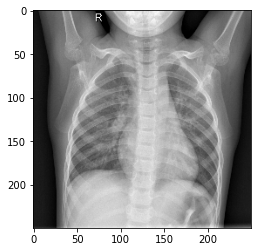

In [9]:
for label in labels:
    path = os.path.join(train_path, label)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img))
        new_arr = cv2.resize(img_arr, (size,size))
        plt.imshow(new_arr)
        plt.show()
        break
    break

In [10]:
new_arr.shape

(250, 250, 3)

In [11]:
def create_data(target_path):
    data = []
    for label in labels:
        path = os.path.join(target_path, label)
        label_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                new_arr = cv2.resize(img_arr, (size,size))
                data.append([new_arr, label_num])
            except Exception as e:
                print(e)
                print(path)
                print(img)
    return data

In [12]:
# train = create_data(train_path)
# len(train)

In [13]:
random.shuffle(train)
for sample in train[:10]:
    print(sample[1])

NameError: name 'train' is not defined

In [14]:
X_train = []
y_train = []

In [15]:
for features, label in train:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1, size, size, 3)
y_train = np.array(y_train)

NameError: name 'train' is not defined

In [16]:
X_train.shape

AttributeError: 'list' object has no attribute 'shape'

In [17]:
def prep_data(prep_path):
    data = create_data(prep_path)
    random.shuffle(data)
    random.shuffle(data)

    X = []
    y = []

    for features, label in data:
        X.append(features)
        y.append(label)

    X = np.array(X).reshape(-1, size, size, 3)
    y = np.array(y)

    return X,y

In [18]:
X_val, y_val = prep_data(val_path)

In [19]:
X_val.shape

(16, 250, 250, 3)

In [20]:
pickle_out = open("X_val.pickle","wb")
pickle.dump(X_val, pickle_out)
pickle_out.close()

pickle_out = open("y_val.pickle","wb")
pickle.dump(y_val, pickle_out)
pickle_out.close()